# Human Machine Agreement

In [26]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [27]:
human = pd.read_csv("/home/ada/humor/data/stand_up_dataset/human_ans - Sheet1.csv")
models = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llm_ans - Sheet1.csv")

Cohen's Kappa

In [28]:
# num_participants = 11
# human['not_funny'] = num_participants - human['funny']
human['human'] = (human['funny'] >= 5).astype(int)
merged_df = pd.merge(human[['comedian', 'sentence', 'human']], models, on=['comedian', 'sentence'])

model_names = ['gemma', 'gemma2', 'llama', 'phi', 'chatgpt', 'claude']  
results = []

for m in model_names:
    kappa = cohen_kappa_score(merged_df['human'], merged_df[m])
    results.append({'comedian': m, 'kappa': kappa}) 

results_df = pd.DataFrame(results)
average_kappa = results_df['kappa'].mean()
results_df.loc[len(results_df.index)] = ["Overall", average_kappa]
results_df

,comedian,kappa
0,gemma,-0.007597
1,gemma2,0.099075
2,llama,-0.039058
3,phi,0.004390
4,chatgpt,0.054420
5,claude,0.262155
6,Overall,0.062231


In [29]:
human

,comedian,sentence,funny,human
0,Joe_List,"So I went to the ear, nose, throat doctor, whi...",0,0
1,Joe_List,It's one doctor.,1,0
2,Joe_List,He knows all three body parts.,2,0
3,Joe_List,I was hoping it was three doctors saving money...,5,1
4,Joe_List,"He's like, ""I'm Bill, this is Susan, and Ted. ...",5,1
...,...,...,...,...
152,Hasan_Minhaj,Look at his brother.,0,0
153,Hasan_Minhaj,"His brother is like, ""I'm fucked. I'm fucked. ...",6,1
154,Hasan_Minhaj,"People say, ""Where's Bobby Jindal from?""",0,0
155,Hasan_Minhaj,That's where he comes from.,0,0


Percentage Agreement Rates

In [30]:
agreement_rates = {}
for model in model_names:
    matches = (merged_df['human'] == merged_df[model])
    agreement_rate = matches.mean() * 100  
    agreement_rates[model] = agreement_rate

agreement_df = pd.DataFrame.from_dict(agreement_rates, orient='index', columns=['Agreement Rate'])

agreement_df


,Agreement Rate
gemma,68.789809
gemma2,68.789809
llama,61.146497
phi,66.878981
chatgpt,28.662420
claude,64.968153


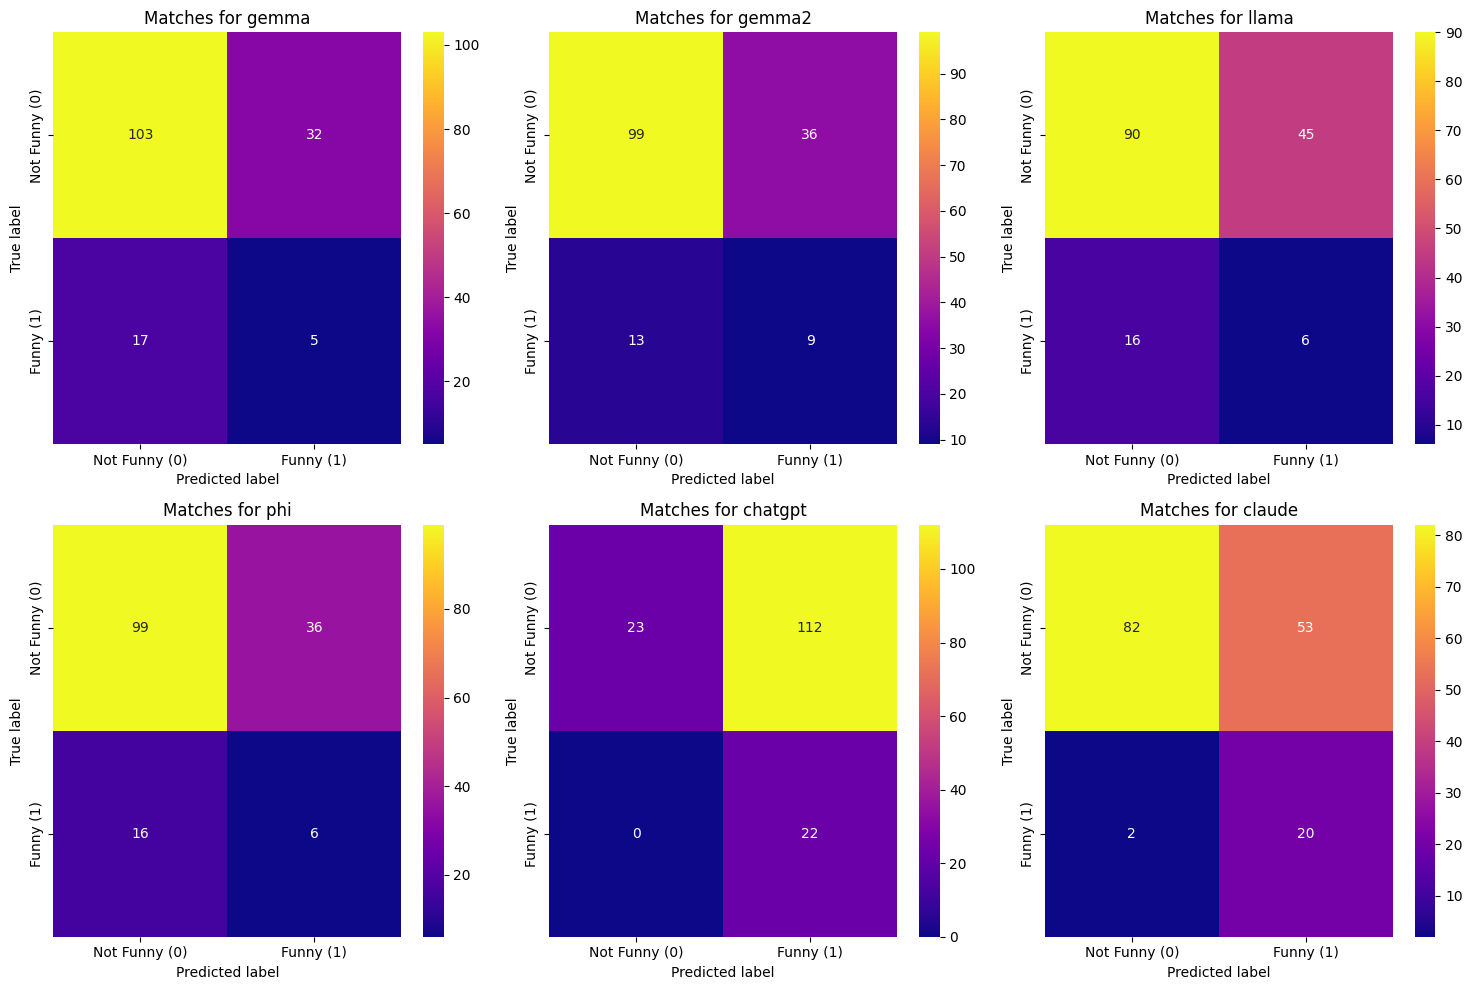

In [31]:
plt.figure(figsize=(15, 10))

for i, model in enumerate(model_names):
    cm = confusion_matrix(merged_df['human'], merged_df[model])
    
    plt.subplot(2, 3, i + 1) 
    sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=['Not Funny (0)', 'Funny (1)'], 
                yticklabels=['Not Funny (0)', 'Funny (1)'])
    
    plt.title(f'Matches for {model}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.tight_layout()
plt.savefig("experiment_10.png", dpi=300)
plt.show()